<a href="https://colab.research.google.com/github/chetassiddhu/asl_sign_language/blob/main/asl_sign_language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chetassiddhu12","key":"5a8568757d42b97bf6408159f9b50bda"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d grassknoted/asl-alphabet


Dataset URL: https://www.kaggle.com/datasets/grassknoted/asl-alphabet
License(s): GPL-2.0
 98% 1.01G/1.03G [00:05<00:00, 168MB/s]
100% 1.03G/1.03G [00:07<00:00, 142MB/s]


In [ ]:
!unzip /content/asl-alphabet.zip -d /content/


Streaming output truncated to the last 5000 lines.
  inflating: /content/asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: /content/asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: /content/asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: /content/asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: /content/asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: /content/asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: /content/asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: /content/asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: /content/asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: /content/asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: /content/asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  infl

In [ ]:
import os

DATA_DIR = '/content/asl_alphabet_train/asl_alphabet_train'
os.listdir(DATA_DIR)


['Y',
 'W',
 'U',
 'P',
 'B',
 'space',
 'H',
 'L',
 'V',
 'R',
 'X',
 'M',
 'F',
 'T',
 'G',
 'C',
 'N',
 'Z',
 'E',
 'A',
 'nothing',
 'K',
 'I',
 'J',
 'S',
 'Q',
 'O',
 'D',
 'del']

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 32


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Pixel values [0-255] → [0-1]
    rotation_range=20,  # Random ghumao (0–20 degree)
    zoom_range=0.2,  # Zoom in/out
    shear_range=0.2,  # Shearing effect (image tilt)
    width_shift_range=0.2,  # Left-right move
    height_shift_range=0.2,  # Up-down move
    horizontal_flip=True,  # Image ko ulta karna
    validation_split=0.2  # 80% training, 20% validation
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # One-hot encoded labels
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [ ]:
print("Classes Detected:", train_generator.class_indices)


Classes Detected: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}


In [ ]:
#buiding a cnn architecture
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(29, activation='softmax')  # 29 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │         7,453 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,605 (4.89 MB)

 Trainable params: 1,280,605 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 166s 74ms/step - accuracy: 0.2183 - loss: 2.6682 - val_accuracy: 0.6904 - val_loss: 1.0329
Epoch 2/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 158s 73ms/step - accuracy: 0.6521 - loss: 1.0488 - val_accuracy: 0.7574 - val_loss: 0.8169
Epoch 3/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 211s 77ms/step - accuracy: 0.7691 - loss: 0.6820 - val_accuracy: 0.8076 - val_loss: 0.6249
Epoch 4/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 159s 73ms/step - accuracy: 0.8285 - loss: 0.5123 - val_accuracy: 0.8194 - val_loss: 0.6238
Epoch 5/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 192s 69ms/step - accuracy: 0.8588 - loss: 0.4258 - val_accuracy: 0.8579 - val_loss: 0.5315
Epoch 6/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 153s 70ms/step - accuracy: 0.8798 - loss: 0.3703 - val_accuracy: 0.8687 - val_loss: 0.4864
Epoch 7/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 150s 69ms/step - accuracy: 0.8883 - loss: 0.3327 - val_accuracy: 0.8688 - val_loss: 0.5156
Epoch 8/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 145s 66ms/step - accuracy: 

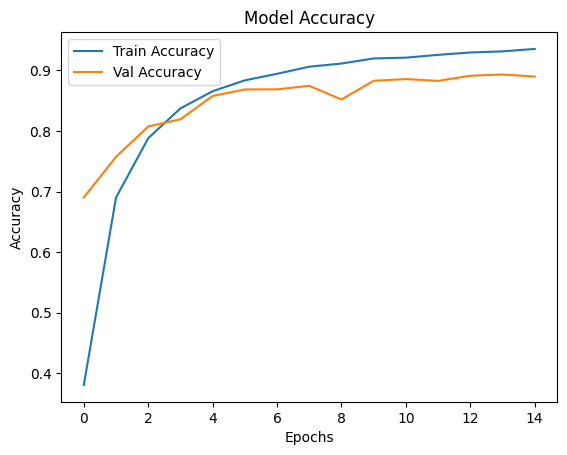

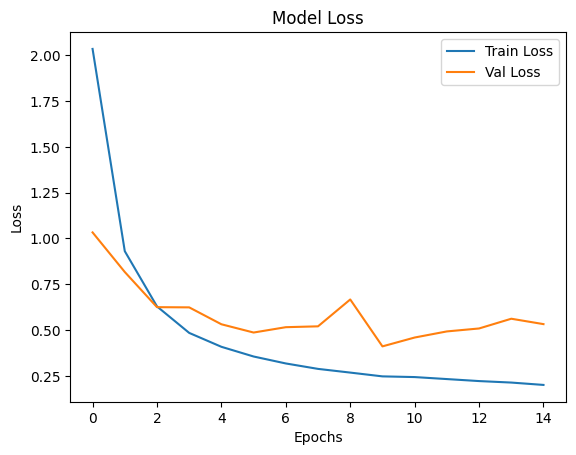

In [ ]:
#checking the accurasy and losss by the grap made by matplot.lib
import matplotlib.pyplot as plt

# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.save("asl_cnn_model.h5")

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model

# ✅ Load trained model
model = load_model("asl_cnn_model.h5")

# ✅ Load and preprocess image
img_path = "/content/asl_alphabet_test/asl_alphabet_test/W_test.jpg"  # replace with your image path
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# ✅ Predict
pred = model.predict(img_array)
predicted_class = np.argmax(pred)

# ✅ Create proper class label list
class_labels = [
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I',
    'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R',
    'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
    'del', 'nothing', 'space'
]

# ✅ Display prediction
print("Predicted Index:", predicted_class)
print("Predicted Class:", class_labels[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
Predicted Index: 22
Predicted Class: W
